In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
stock = 'NVDA'
data = yf.download(stock, start="2023-01-01", end ="2025-01-01")

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,14.303278,14.983721,14.084457,14.838839,401277000
2023-01-04,14.736924,14.840839,14.229341,14.555074,431324000
2023-01-05,14.253324,14.552079,14.136419,14.479138,389168000
2023-01-06,14.846834,14.997711,14.022510,14.462149,405044000
2023-01-09,15.615205,16.042854,15.128603,15.271487,504231000


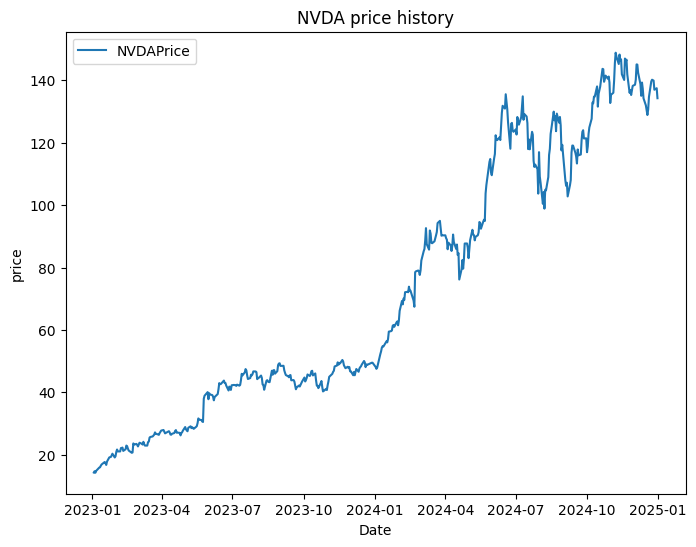

In [28]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'], label=f'{stock}Price')
plt.xlabel('Date')
plt.ylabel('price')
plt.title(f'{stock} price history')
plt.legend()
plt.show()

In [30]:
#Data preprocessing

data['Date'] = data.index.astype('int64')//10**9

In [31]:
#Normalize price

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Open','High','Low','Close','Volume']]= scaler.fit_transform(data[['Open','High','Low','Close','Volume']])

In [32]:
#features moving averages such as 5SMA and 10SMA

data['5-day SMA'] = data['Close'].rolling(window=5).mean()
data['10-day SMA'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

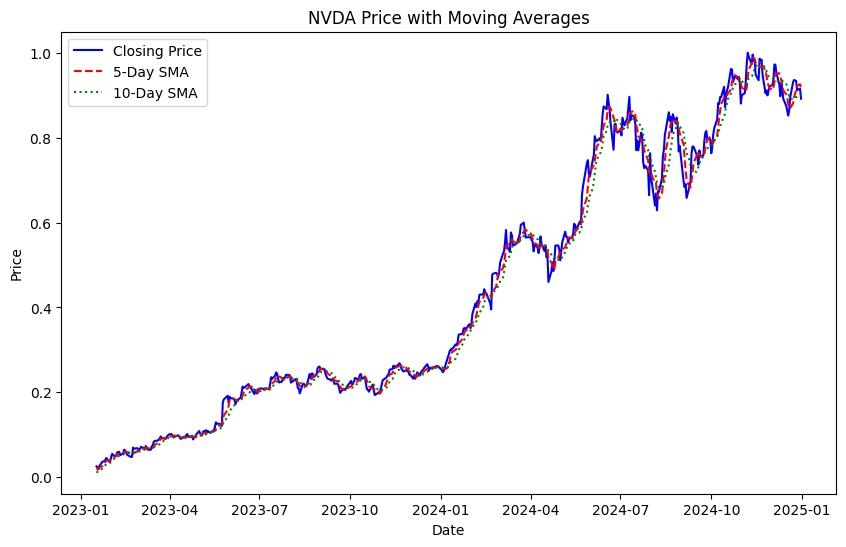

In [33]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['5-day SMA'], label='5-Day SMA', linestyle='dashed', color='red')
plt.plot(data['10-day SMA'], label='10-Day SMA', linestyle='dotted', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Price with Moving Averages')
plt.legend()
plt.show()


In [14]:
data['Next Day Close']=data['Close'].shift(-1)
data.dropna(inplace=True)

x=data[['Close','5-day SMA','10-day SMA']]
y=data['Next Day Close']

In [15]:
#Train linear regression model

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, shuffle=False)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

print("Model Coefficient:", model.coef_)

Model Coefficient: [ 0.89326539  0.2128592  -0.09979822]


In [17]:
#Evaluate the model performance

y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error:{mse}")

Mean Squared Error:0.0007628064996603014


In [19]:
#compare with baseline model

baseline_mse = mean_squared_error(y_test,x_test['Close'])
print(f"Baseline MSE:{baseline_mse}")

Baseline MSE:0.0007355307605668286


In [20]:
#polynomial regression for better accuracy

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
poly_model.fit(x_train, y_train)

y_poly_pred = poly_model.predict(x_test)
poly_mse = mean_squared_error(y_test,y_poly_pred)

print(f"Polynomial Regression MSE: {poly_mse}")

Polynomial Regression MSE: 0.001171038601255877


In [21]:
#model evaluation using r2_score

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f"R2 score: {r2:.4f}")

R2 score: 0.9618


In [25]:
#save the model

import joblib
joblib.dump(model, 'stock_prediction_model.pkl')

['stock_prediction_model.pkl']